# Title

## Download data

In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import hvplot.xarray
import cartopy
import cartopy.crs as ccrs
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (10,10)
import fsspec
import gdrivefs
from skimage import measure

In [ ]:
# ! pip install fsspec==0.8.4
# ! pip install 'git+git://github.com/tjcrone/gdrivefs.git@540a55fae06cbed4f7d9f8d540ac29fcb640c38a'

In [2]:
gdfid = '1hzH32KcsdMtNX0f9_WkMTCyf20tj6ZLk'
gdfs = gdrivefs.GoogleDriveFileSystem(root_file_id = gdfid, token = 'cache')

In [3]:
files = gdfs.ls('/')
files

['ICE.2000-2010.zarr',
 'ICE.2000.01-12.c41.nc',
 'ICE.2001.01-12.c42.nc',
 'ICE.2002.01-12.c43.nc',
 'ICE.2003.01-12.c44.nc',
 'ICE.2004.01-12.c45.nc',
 'ICE.2005.01-12.c46.nc',
 'ICE.2006.01-12.c47.nc',
 'ICE.2007.01-12.c48.nc',
 'ICE.2008.01-12.c49.nc',
 'ICE.2009.01-12.c50.nc',
 'ICE.2010.01-12.c51.nc']

In [4]:
ofs = []
for file in files[1:]:
    ofs.append(gdfs.open(file))

ds = xr.open_mfdataset(ofs)
ds

<xarray.Dataset>
Dimensions:         (ATMLAY: 3, ATMLAY3_3: 1, OUTLAY: 18, OUTLAY1_1: 1, PLEV: 7, SECTOR: 2, SECTOR1_1: 1, TIME: 4018, X12_84: 73, Y21_155: 135, ZTQLEV: 4, ZUVLEV: 3, bnds: 2)
Coordinates:
  * OUTLAY1_1       (OUTLAY1_1) float32 0.0
  * ZUVLEV          (ZUVLEV) float32 10.0 50.0 100.0
  * OUTLAY          (OUTLAY) float32 0.0 0.05 0.1 0.2 0.3 ... 7.5 10.0 15.0 20.0
  * PLEV            (PLEV) float32 200.0 500.0 600.0 700.0 800.0 850.0 925.0
  * SECTOR1_1       (SECTOR1_1) float32 1.0
  * ZTQLEV          (ZTQLEV) float32 2.0 10.0 50.0 100.0
  * ATMLAY          (ATMLAY) float32 0.99899215 0.99937004 0.99974793
  * X12_84          (X12_84) float32 -760.0 -740.0 -720.0 ... 640.0 660.0 680.0
  * Y21_155         (Y21_155) float32 -1180.0 -1160.0 -1140.0 ... 1480.0 1500.0
  * ATMLAY3_3       (ATMLAY3_3) float32 0.99974793
  * SECTOR          (SECTOR) float32 1.0 2.0
  * TIME            (TIME) datetime64[ns] 2000-01-01T12:00:00 ... 2010-12-31T...
Dimensions without coordinates: bnds
Data variables:
    TIME_bnds       (TIME, bnds) datetime64[ns] dask.array<chunksize=(366, 2), meta=np.ndarray>
    DATE            (TIME) float32 dask.array<chunksize=(366,), meta=np.ndarray>
    YYYY            (TIME) float32 dask.array<chunksize=(366,), meta=np.ndarray>
    MM              (TIME) float32 dask.array<chunksize=(366,), meta=np.ndarray>
    DD              (TIME) float32 dask.array<chunksize=(366,), meta=np.ndarray>
    HH              (TIME) float32 dask.array<chunksize=(366,), meta=np.ndarray>
    MIN             (TIME) float32 dask.array<chunksize=(366,), meta=np.ndarray>
    LON             (TIME, Y21_155, X12_84) float32 dask.array<chunksize=(366, 135, 73), meta=np.ndarray>
    LAT             (TIME, Y21_155, X12_84) float32 dask.array<chunksize=(366, 135, 73), meta=np.ndarray>
    SH              (TIME, Y21_155, X12_84) float32 dask.array<chunksize=(366, 135, 73), meta=np.ndarray>
    SRF             (TIME, Y21_155, X12_84) float32 dask.array<chunksize=(366, 135, 73), meta=np.ndarray>
    SOL             (TIME, Y21_155, X12_84) float32 dask.array<chunksize=(366, 135, 73), meta=np.ndarray>
    SLO             (TIME, Y21_155, X12_84) float32 dask.array<chunksize=(366, 135, 73), meta=np.ndarray>
    CZ              (TIME, Y21_155, X12_84) float32 dask.array<chunksize=(366, 135, 73), meta=np.ndarray>
    SAL             (TIME, Y21_155, X12_84) float32 dask.array<chunksize=(366, 135, 73), meta=np.ndarray>
    VEG             (TIME, SECTOR, Y21_155, X12_84) float32 dask.array<chunksize=(366, 2, 135, 73), meta=np.ndarray>
    MSK             (TIME, Y21_155, X12_84) float32 dask.array<chunksize=(366, 135, 73), meta=np.ndarray>
    FRV             (TIME, SECTOR, Y21_155, X12_84) float32 dask.array<chunksize=(366, 2, 135, 73), meta=np.ndarray>
    FRA             (TIME, SECTOR, Y21_155, X12_84) float32 dask.array<chunksize=(366, 2, 135, 73), meta=np.ndarray>
    SHSN0           (TIME, SECTOR1_1, Y21_155, X12_84) float32 dask.array<chunksize=(366, 1, 135, 73), meta=np.ndarray>
    SHSN2           (TIME, SECTOR1_1, Y21_155, X12_84) float32 dask.array<chunksize=(366, 1, 135, 73), meta=np.ndarray>
    SHSN3           (TIME, SECTOR, Y21_155, X12_84) float32 dask.array<chunksize=(366, 2, 135, 73), meta=np.ndarray>
    ZN4             (TIME, SECTOR1_1, Y21_155, X12_84) float32 dask.array<chunksize=(366, 1, 135, 73), meta=np.ndarray>
    ZN5             (TIME, SECTOR1_1, Y21_155, X12_84) float32 dask.array<chunksize=(366, 1, 135, 73), meta=np.ndarray>
    ZN6             (TIME, SECTOR1_1, Y21_155, X12_84) float32 dask.array<chunksize=(366, 1, 135, 73), meta=np.ndarray>
    SMB             (TIME, SECTOR, Y21_155, X12_84) float32 dask.array<chunksize=(366, 2, 135, 73), meta=np.ndarray>
    SU              (TIME, SECTOR, Y21_155, X12_84) float32 dask.array<chunksize=(366, 2, 135, 73), meta=np.ndarray>
    ME              (TIME, SECTOR1_1, Y21_155, X12_84) float32 dask.array<chunksize=(366, 1, 135, 73), meta=np.ndarray>
    RZ              (

Rechunking

In [5]:
import dask.array as da

In [21]:
source_group = ds

In [22]:
from rechunker import rechunk

target_chunks = {
    'LHF': {'TIME': 100, 'Y21_155': 135, 'X12_84': 73}
}

max_mem = '1MB'

target_store = 'ICE.2000-2010.zarr'
temp_store = 'ICE.2000-2010-tmp.zarr'

array_plan = rechunk(source_group, target_chunks, max_mem, target_store, temp_store=temp_store)
array_plan

ValueError: Source must be a Zarr Array or Group, or a Dask Array.

In [15]:
mapper = gdfs.get_mapper('ICE.2000-2010.zarr')

In [ ]:
ds.to_zarr(mapper)

In [ ]:
ds = xr.open_zarr(mapper)

In [35]:
# ds_decimated = xr.open_zarr(mapper, drop_variables={'AG', 'AG1', 'AL', 'AL1', 'COD', 'CP', 'CWP', 'CZ', 'FRA', 'FRV', 'G11', 'G21', 'IWP', 'LHF', 'LWD', 'LWU', 'ME', 'QI', 'QQ', 'QQP', 'QQZ', 'QR', 'QS', 'QW', 'RF', 'RH', 'RU2', 'RZ', 'SAL', 'SF', 'SHF', 'SHSN0', 'SHSN3', 'SLO', 'SMB', 'SOL', 'SP', 'SF', 'SRF', 'ST', 'ST2', 'SU', 'SW', 'SWD' 'TI1', 'TT', 'TTMAX', 'TTMIN', 'TTP', 'TTZ', 'UU', 'UUP', 'UUZ', 'UV', 'UVZ', 'VEG', 'VV', 'VVP', 'VVZ', 'WA1', 'WVP', 'ZN4', 'ZN5', 'ZN6', 'ZZ', 'ZZP'})
# ds_decimated

## Dataprocessing

Only include cells where the ice fraction is larger than 50%

In [13]:
ds_MSK = ds.where(ds.MSK >= 50)
lat = ds.LAT[0,:,:]
lon = ds.LON[0,:,:]

Only include Greenland ice sheet, not Canada

In [14]:
blobs = ds.MSK[0,:,:] > 50
all_labels = measure.label(blobs)
GrIS_label = all_labels * 1.0
GrIS_label[GrIS_label == 0] = np.nan
GrIS_label[GrIS_label > 1] = np.nan

Define extent for map plots

In [15]:
extent = [-55,-25,58,84]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

/srv/conda/envs/notebook/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1763: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


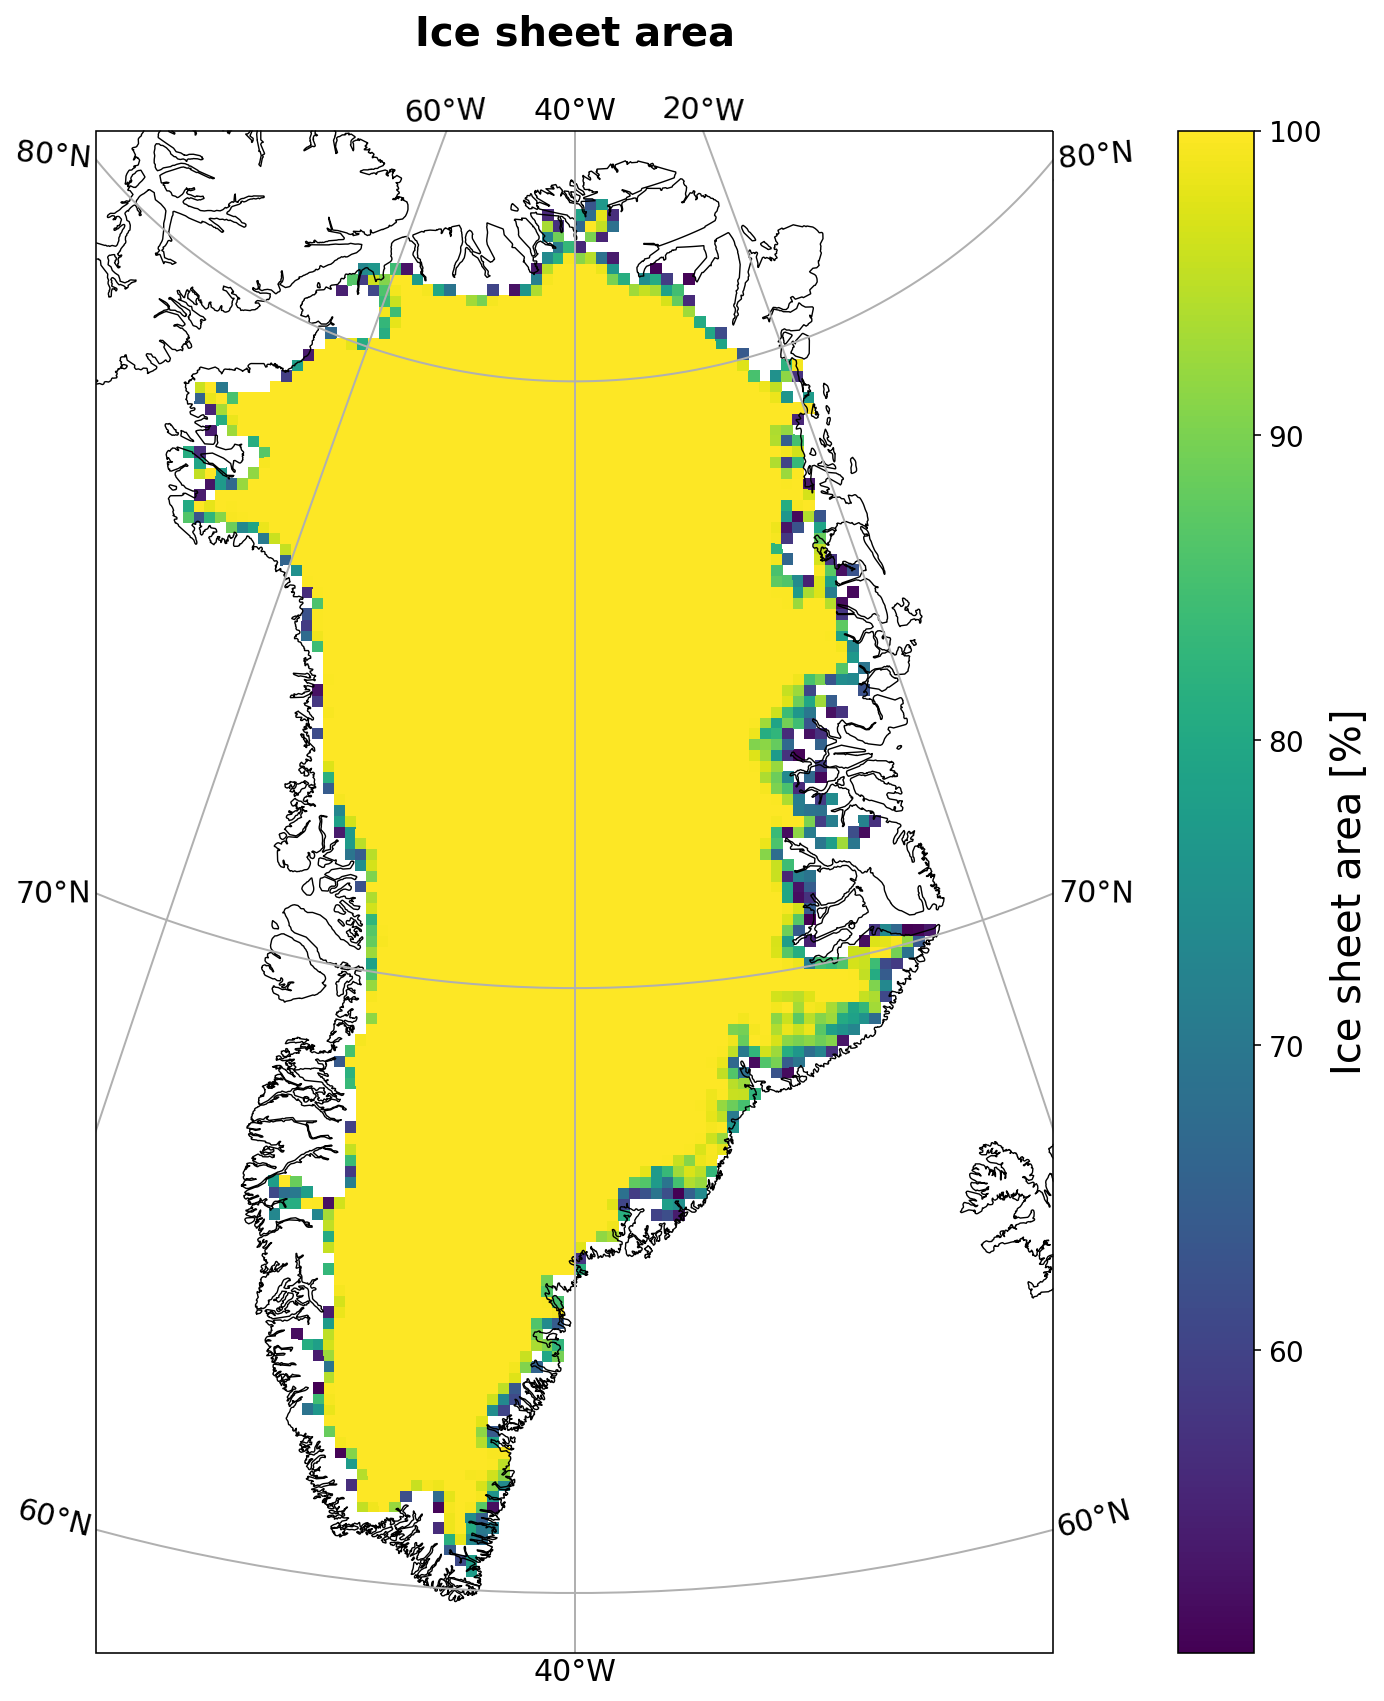

In [16]:
fig = plt.figure(figsize=(14,14))
ax = plt.axes(projection = ccrs.Orthographic(central_lon, central_lat))
ax.set_extent(extent)
ax.coastlines(resolution = '10m', linewidth=0.7)
c = ax.pcolor(lon, lat, ds_MSK.MSK[0,:,:] * GrIS_label, transform=ccrs.PlateCarree())
cbar = fig.colorbar(c, ax=ax, pad = 0.08)
cbar.set_label('Ice sheet area [%]', fontsize=20)
cbar.ax.tick_params(labelsize=14)

gl = ax.gridlines(draw_labels=True, linewidth=1, alpha=1)
gl.xlocator = mticker.FixedLocator([-60, -40, -20])
gl.xlabel_style = {'size': 15, 'color': 'black'}
gl.ylocator = mticker.FixedLocator([60, 70, 80])
gl.ylabel_style = {'size': 15, 'color': 'black'}
plt.title('Ice sheet area', weight='semibold', fontsize=20, pad=25);

In [17]:
ds_MSK.CC * GrIS_label

<xarray.DataArray 'CC' (TIME: 4018, Y21_155: 135, X12_84: 73)>
dask.array<mul, shape=(4018, 135, 73), dtype=float64, chunksize=(366, 135, 73), chunktype=numpy.ndarray>
Coordinates:
  * X12_84   (X12_84) float32 -760.0 -740.0 -720.0 -700.0 ... 640.0 660.0 680.0
  * Y21_155  (Y21_155) float32 -1180.0 -1160.0 -1140.0 ... 1460.0 1480.0 1500.0
  * TIME     (TIME) datetime64[ns] 2000-01-01T12:00:00 ... 2010-12-31T12:00:00

In [238]:
ds_MSK_y = ds_MSK.TIME.groupby('TIME.year')
ds_MSK_y

DataArrayGroupBy, grouped over 'year' 
11 groups with labels 2000, 2001, 2002, ..., 2009, 2010.

In [18]:
# Annual means
fig = plt.figure(figsize=(14,14))
(ds_MSK.CC * GrIS_label).groupby('TIME.year').mean(dim=['TIME','Y21_155', 'X12_84']).hvplot()
(ds_MSK.CU * GrIS_label).groupby('TIME.year').mean(dim=['TIME','Y21_155', 'X12_84']).hvplot()

:Curve   [year]   (CC)

<Figure size 1008x1008 with 0 Axes>

In [259]:
ds_MSK.CC.groupby('TIME.day').mean(dim=['TIME','Y21_155', 'X12_84']).hvplot()


:Curve   [day]   (CC)

/srv/conda/envs/notebook/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


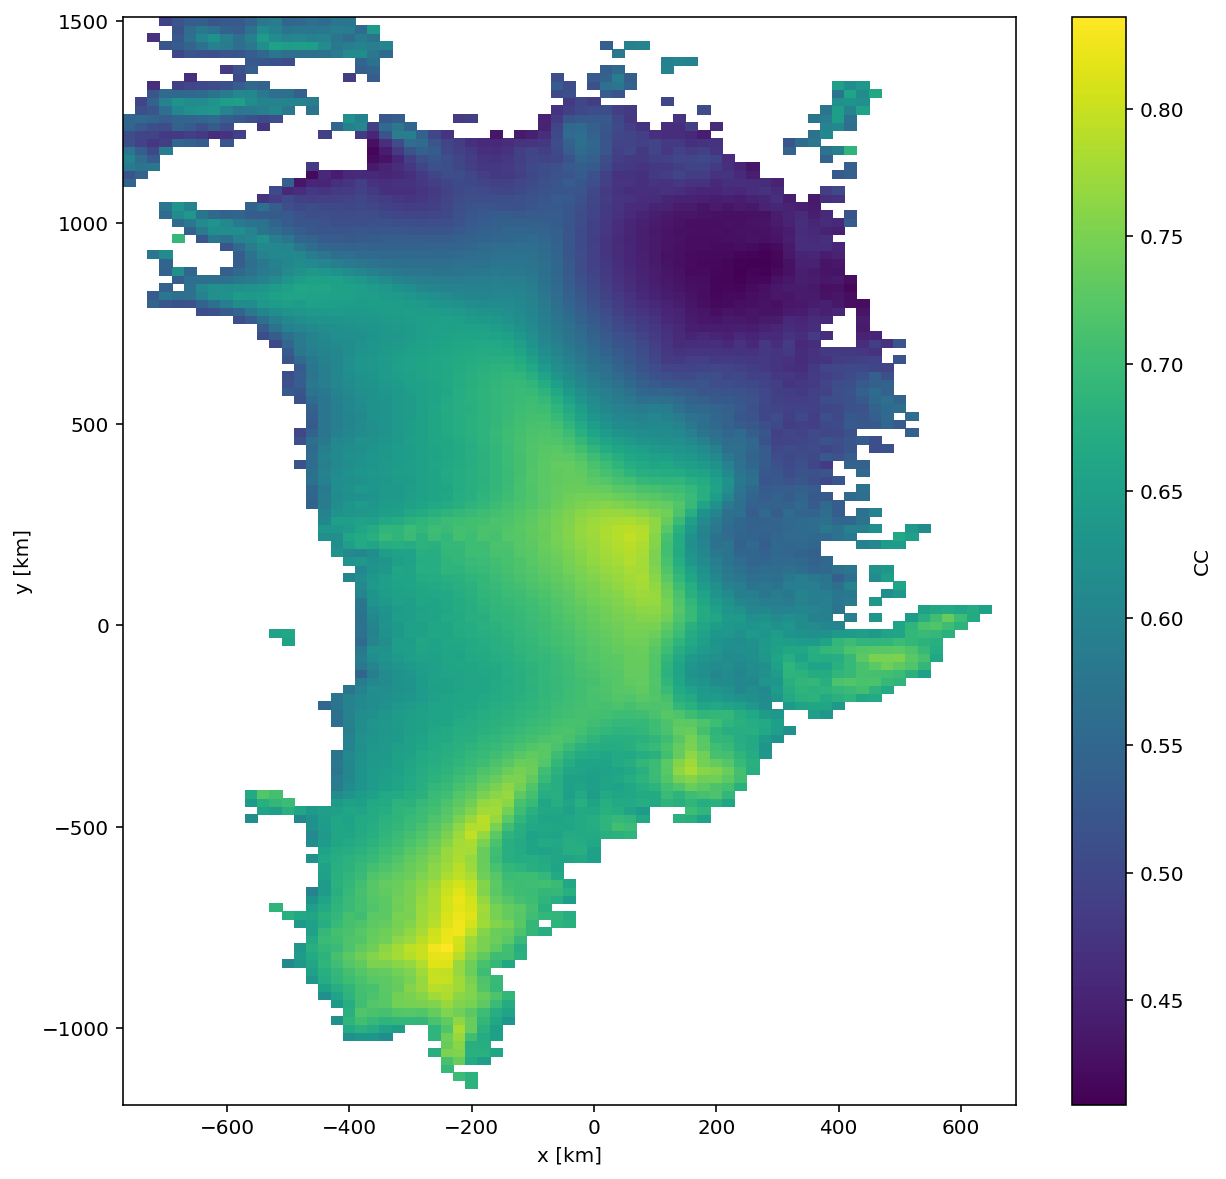

In [230]:
# subplots of upper, middle, lower cloud content

ds_MSK.CU.mean(dim='TIME').plot();

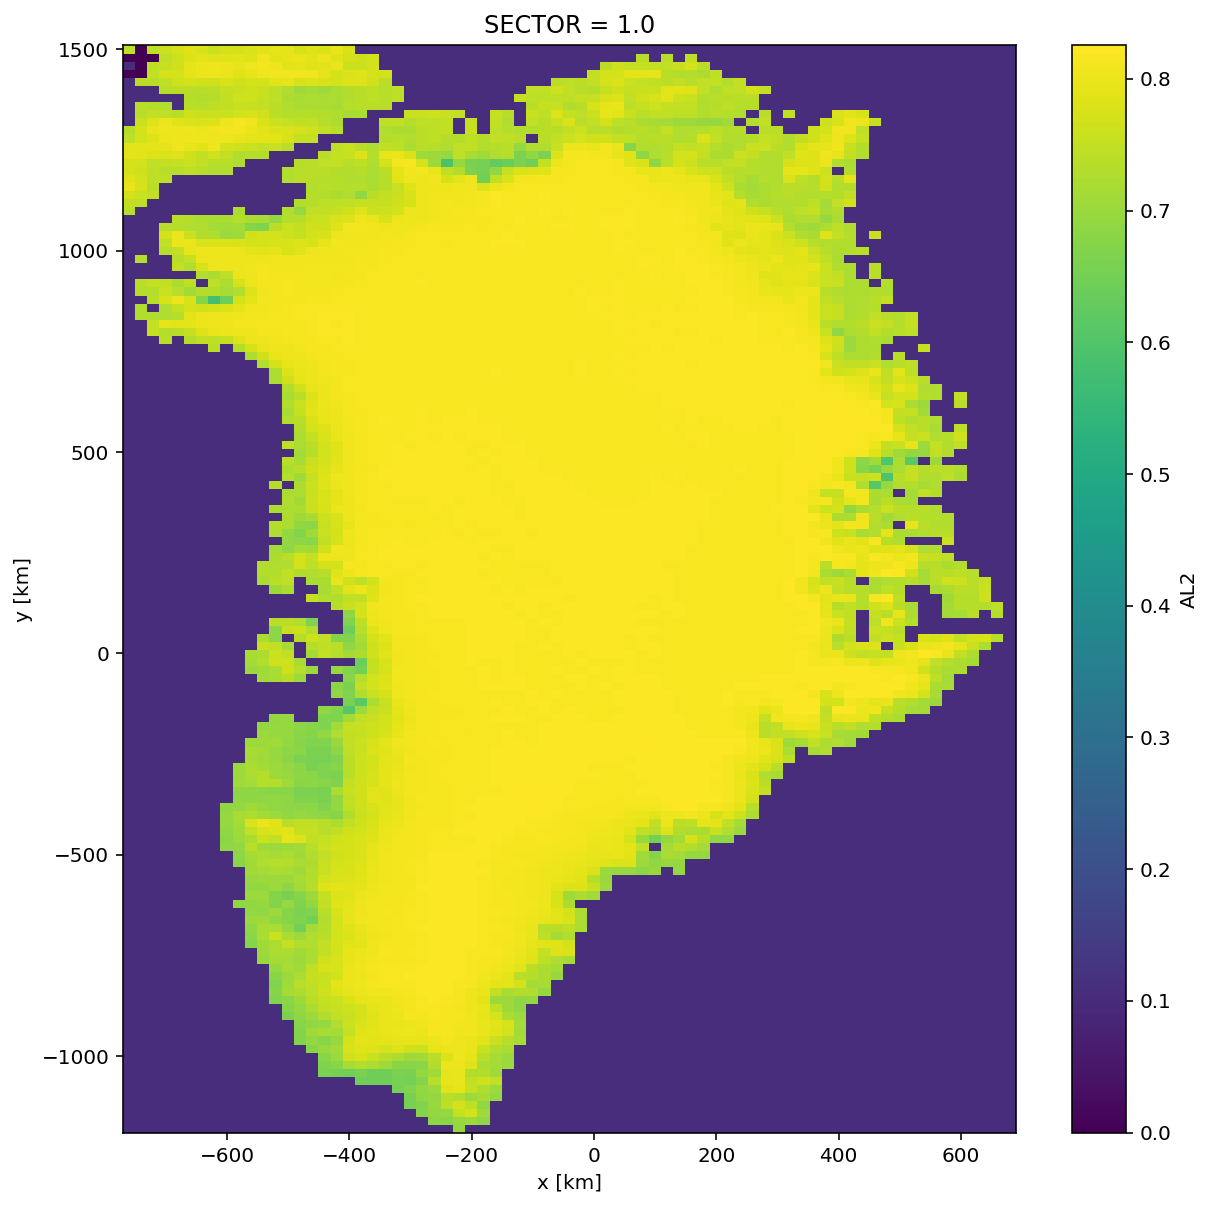

In [46]:
ds.AL2[:,0,:,:].mean(dim='TIME').plot();